# HW4 – statistics and data analysis.

### IDs:

ID #1: 204710156

ID #2: 305073330

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import random


Load the dataset

In [4]:
df_ami = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding="ISO-8859-1", engine='python', skiprows=58, header=None, usecols=range(0,100)) 
df_ami = df_ami.iloc[1:]
df_ami.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
2,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
3,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
4,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
5,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
6,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
7,1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
8,1294_at,9.290410779,9.462275035,9.116776316,9.134584186,9.582343511,9.538661422,9.837551637,10.11188891,9.629918501,...,8.596478981,7.946866042,8.57628061,8.762451755,7.143351687,7.355729877,7.944294937,8.563122679,8.699221635,8.194374083
9,1316_at,6.998285145,6.558214949,6.851622539,7.357827486,7.283872601,7.43717345,7.127690377,8.214922404,7.415155953,...,5.867730571,5.939551491,7.529577619,6.325740711,5.420595545,6.206879166,6.638364166,7.379567509,6.598349589,6.133298023
10,1320_at,5.348943925,5.410884095,5.254073031,5.242139865,5.219483996,5.408639388,5.111689416,5.61726259,5.317689635,...,5.78931739,5.198087208,7.342617602,5.501749787,6.335446059,6.217929861,5.992343792,5.766028609,5.577456268,6.193797335


#### a. High level description of the data and some pre-processing
1) How many genes profiled?<br>
2) How many samples (subjects/patients) in total?<br>
3) How many samples in each class?<br>
4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?<br>
5) Pick 20 genes at random. Draw histograms comparing expression levels of each of these genes in the two classes M and H.

In [5]:
print("{} genes are profiled in this dataset".format(len(df_ami)-2))

54675 genes are profiled in this dataset


In [6]:
print ("There are {} samples (patients) in total".format(len(df_ami.columns)-1))

There are 99 samples (patients) in total


In [7]:
healthy_pat = (df_ami.iloc[0] == 'H').sum()
disease_pat = (df_ami.iloc[0] == 'M').sum()
print("There are {} healthy patients".format(healthy_pat))
print("There are {} myocardial patients".format(disease_pat))

There are 50 healthy patients
There are 49 myocardial patients


In [8]:
df_ami = df_ami.dropna()
print("{} genes are profiled in this dataset after delete the missing values".format(len(df_ami)-2))

54628 genes are profiled in this dataset after delete the missing values


In [9]:
#healthy dataset
df_h = df_ami.loc[:, (df_ami.iloc[0] == 'H')]
#disease dataset
df_d = df_ami.loc[:, (df_ami.iloc[0] == 'M')]


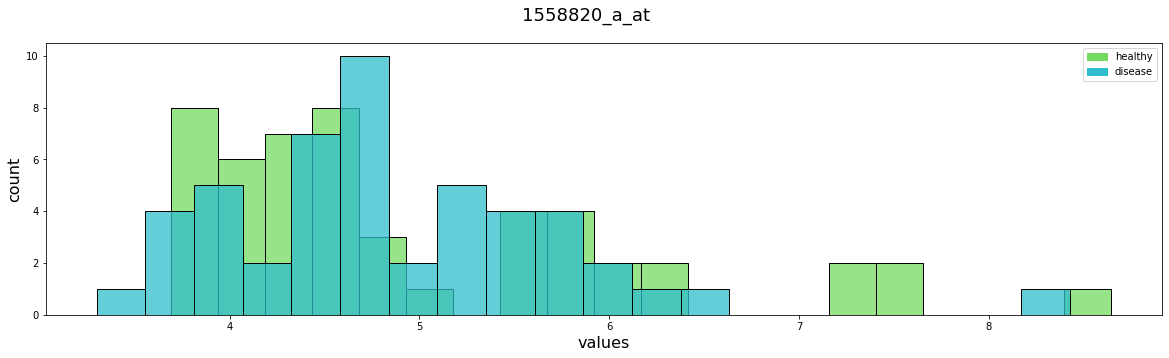

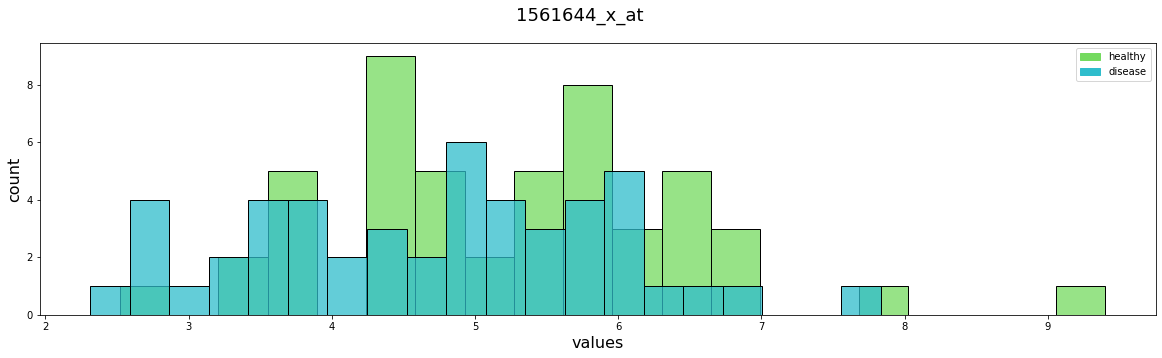

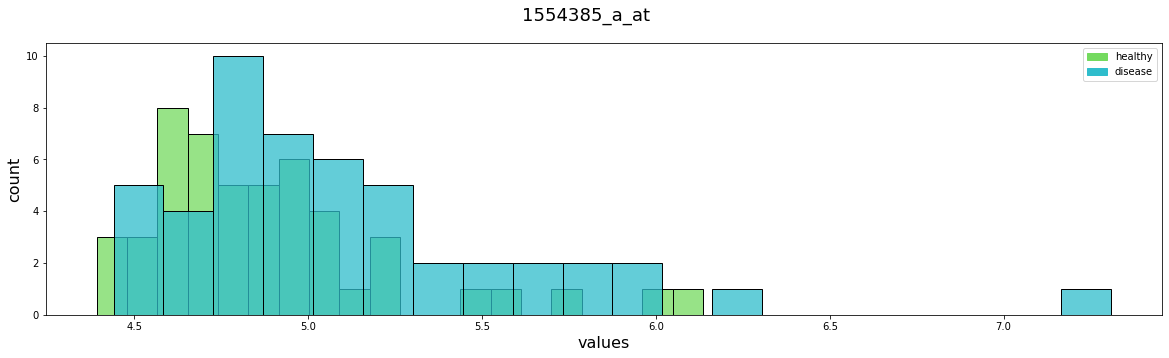

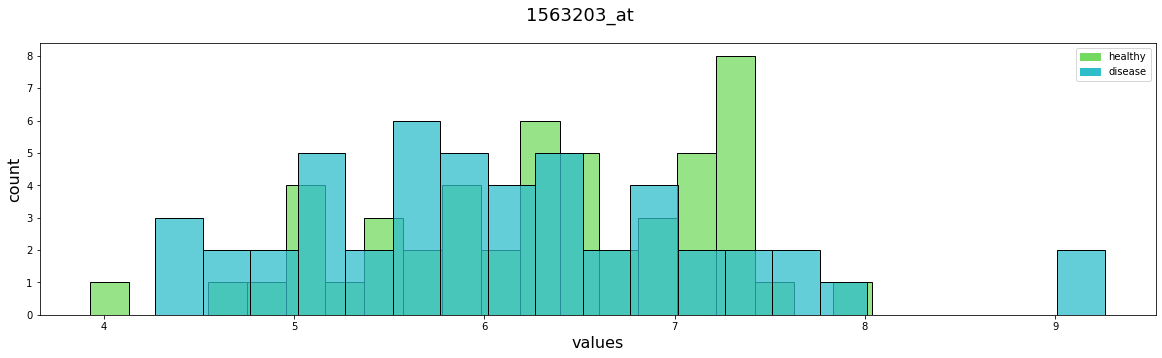

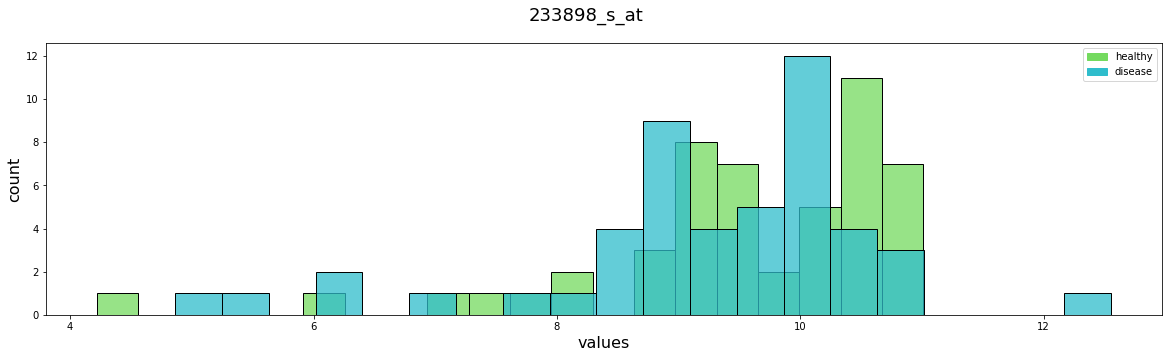

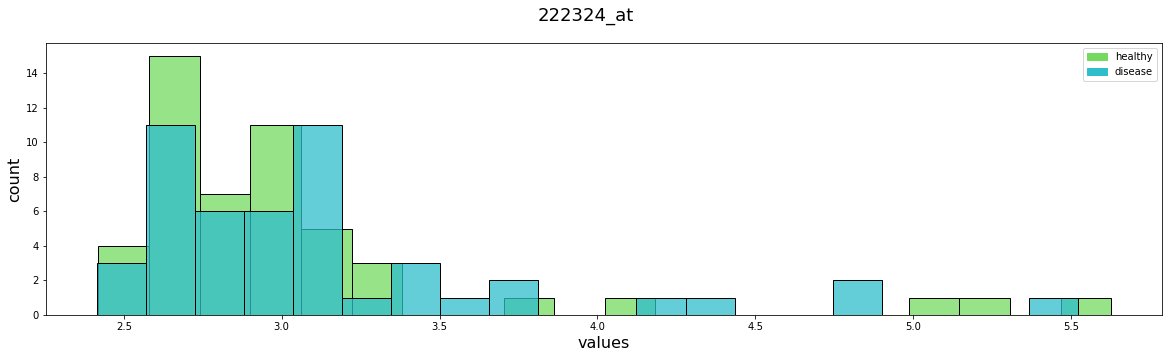

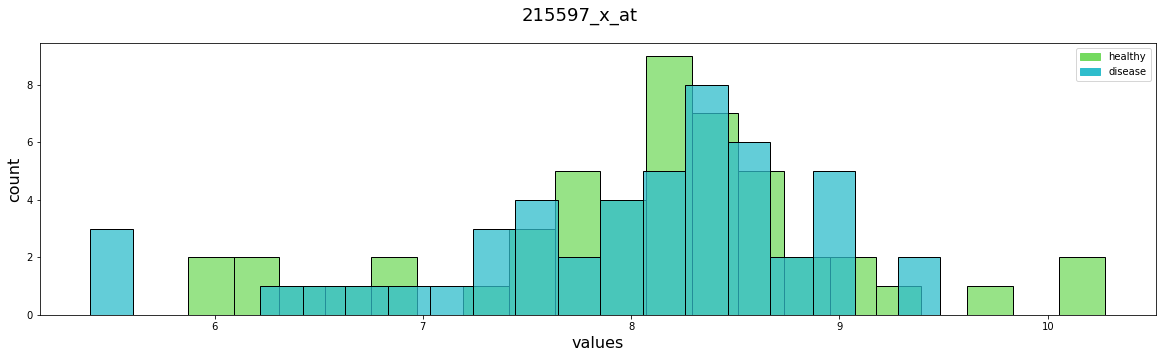

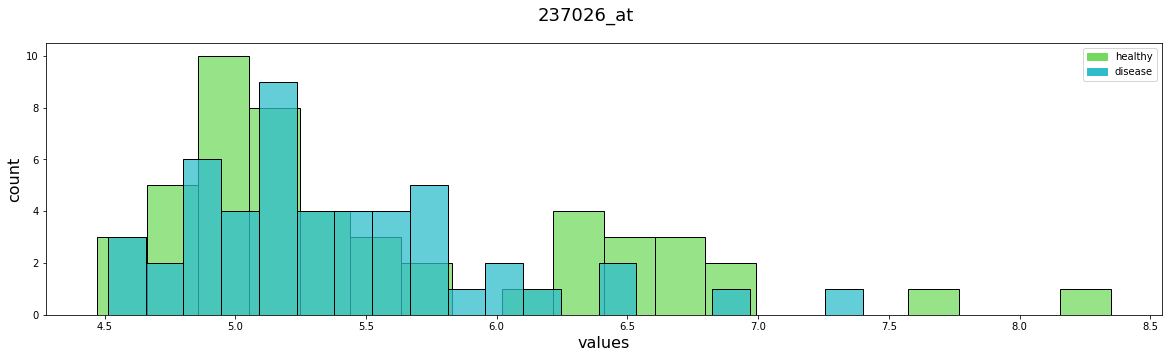

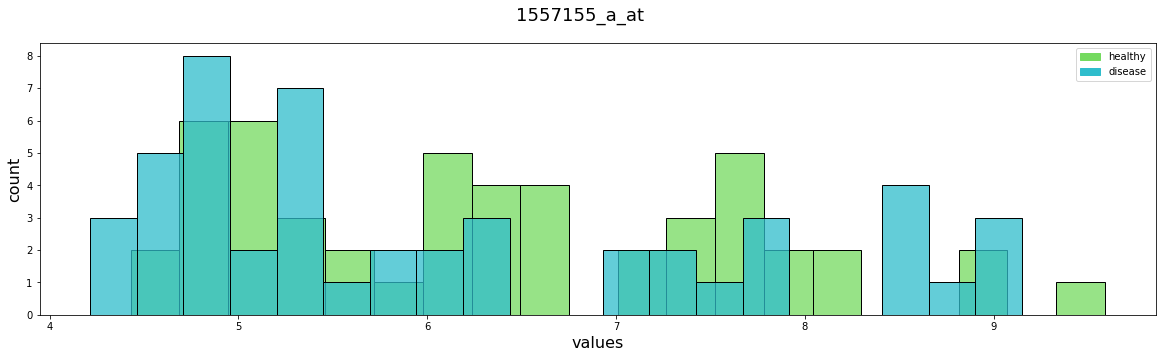

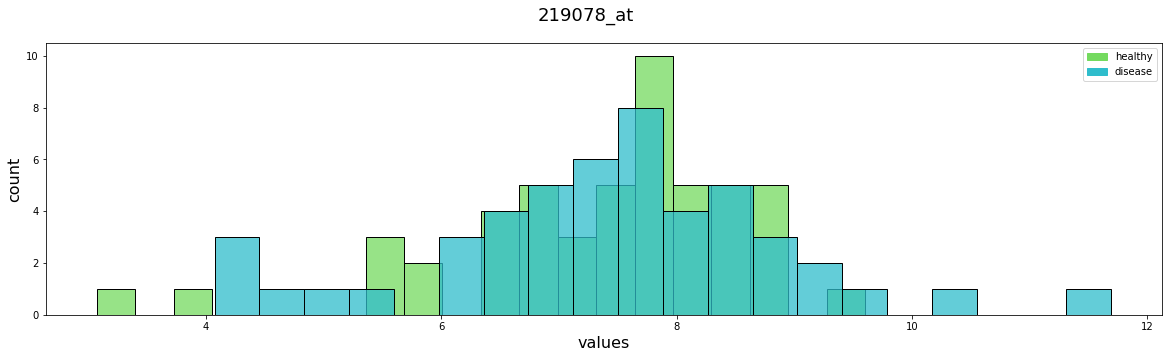

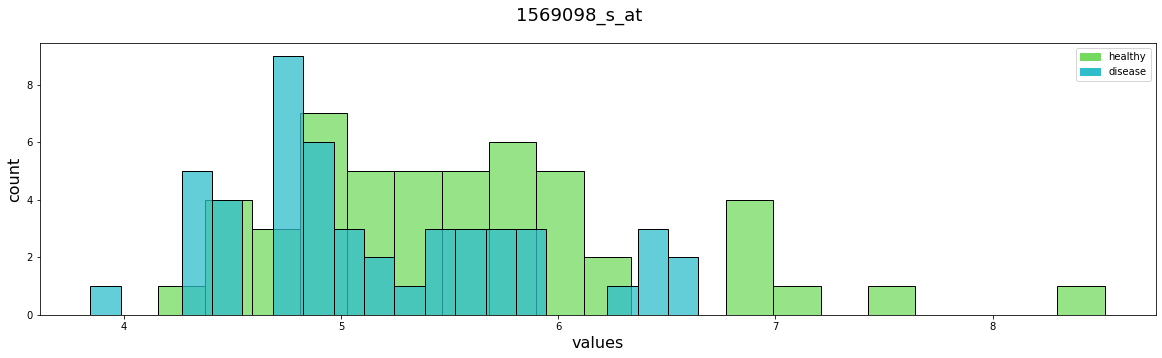

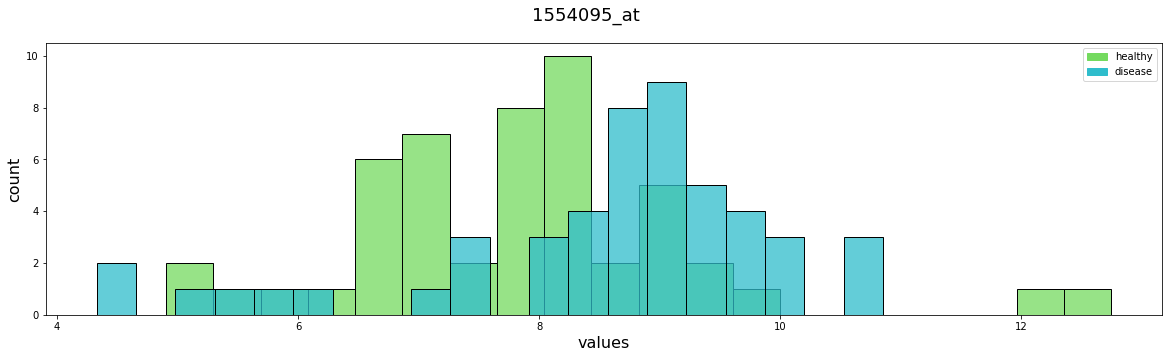

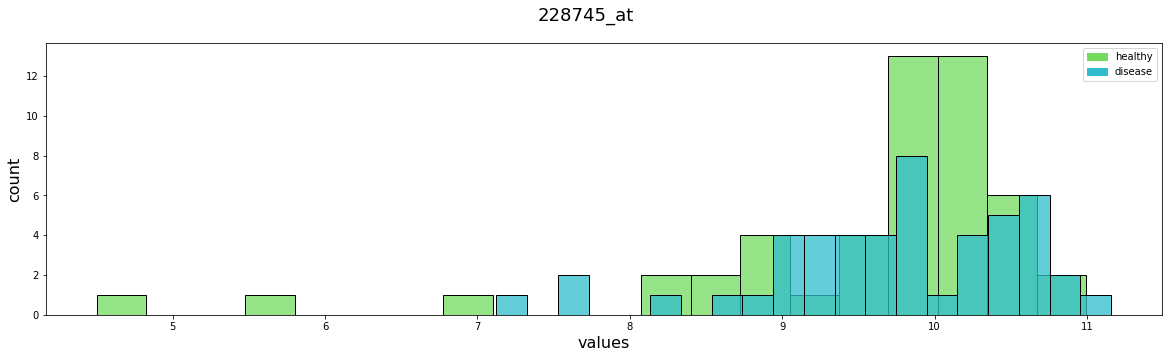

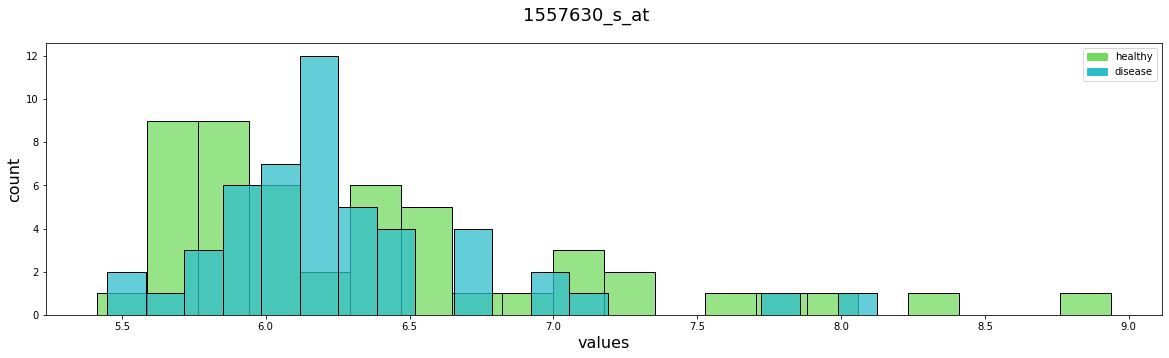

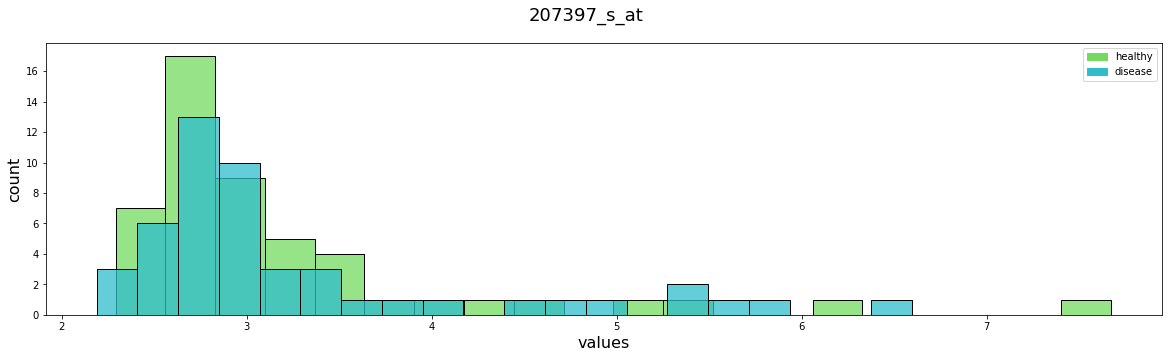

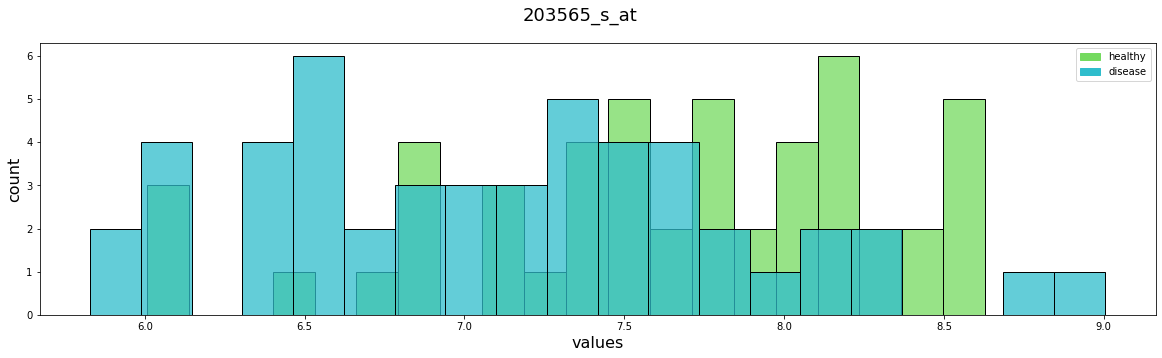

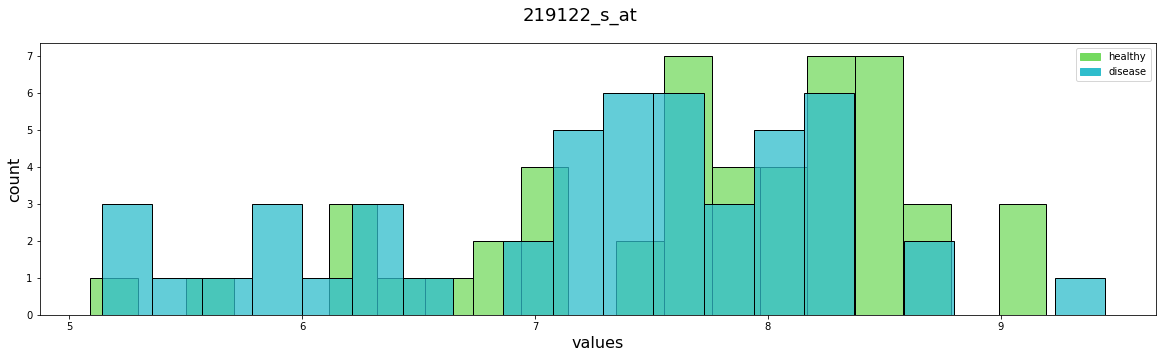

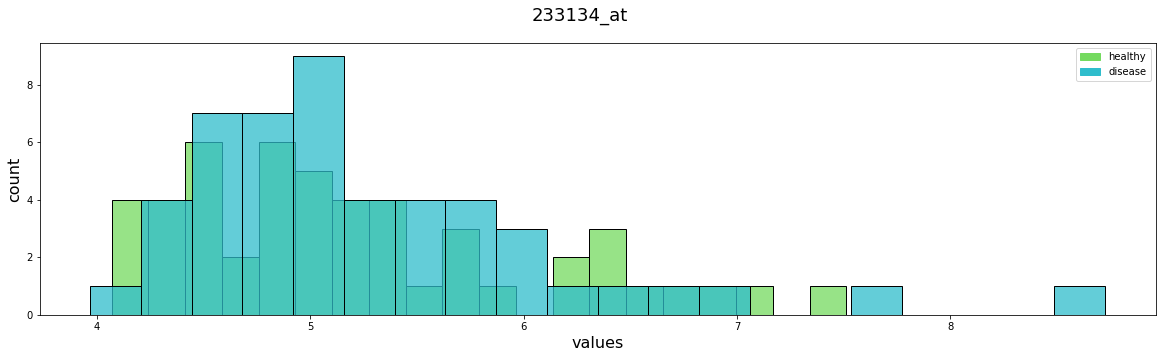

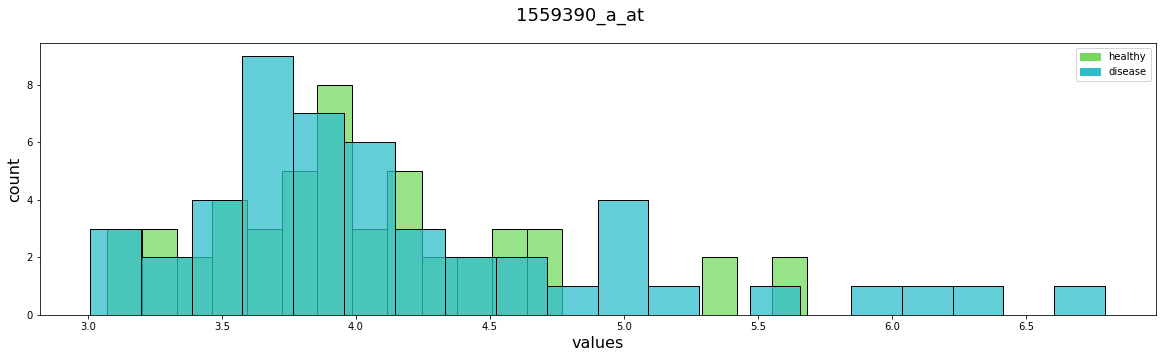

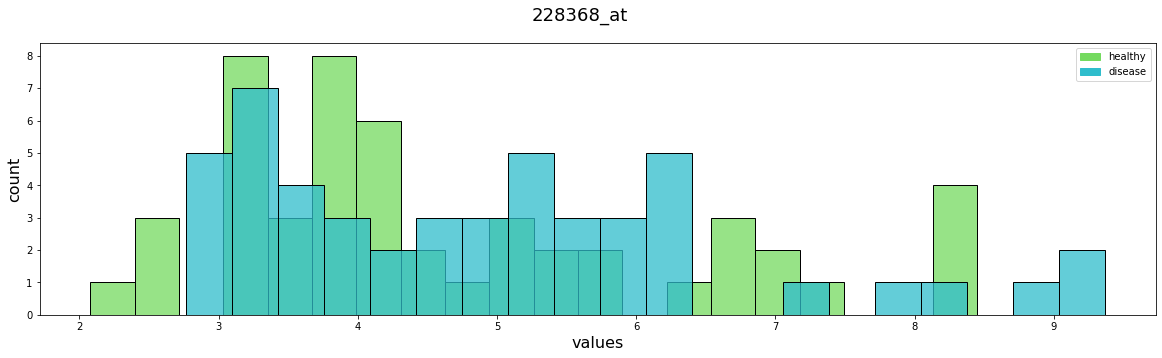

In [10]:
import matplotlib.patches as mpatches

ran = np.random.randint(2,len(df_ami)-2,20)
for i in ran:
    h = df_h.iloc[i].to_numpy()
    h = h.astype(np.float)
    d = df_d.iloc[i].to_numpy()
    d = d.astype(np.float)
    gene = df_ami.iat[i,0]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
    fig.suptitle(gene, fontsize=18)
    sns.histplot(x=h, ax=ax, bins=20, color="#74DA5F", legend=True)
    sns.histplot(x=d, ax=ax, bins=20, color="#2FBDCC", legend=True)
    ax.set_xlabel('values', size=16)
    ax.set_ylabel('count', size=16)
    h_leg = mpatches.Patch(color='#74DA5F', label='healthy')
    d_leg = mpatches.Patch(color='#2FBDCC', label='disease')
    plt.legend(handles=[h_leg, d_leg])

#### b. WRS for differential expression (DE)
1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?<br>
2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?<br>
3) Under the null model, what is the probability of RS(g) = c? (provide a formula for this and explain it)<br>
4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (provide formulas and explain them)<br>
5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribtuion.<br>

In [11]:
#1
expected_sum = disease_pat*(len(df_ami.columns))/2
print("The expected sum of ranks of g’s expression levels measured for samples labeled M is: {}".format(expected_sum))

The expected sum of ranks of g’s expression levels measured for samples labeled M is: 2450.0


In [12]:
#2
#all 49 disease patients ranked the highest
sum_highest_ranks = sum(np.arange(51,100))
print("The maximal value, c, that RS(g) can take is: {}".format(sum_highest_ranks))

The maximal value, c, that RS(g) can take is: 3675


#### 3:
The null model assumes that there is no difference between healthy and disease patients and their ranks are mix together randomly.<br>
Since in RS(g)=c all disease patients rank the highest and all healthy patints are ranked the lowest, we expect significant p-value for c.<br>
The sample space is N choose B where N=total patients, B=disease patients.<br>
event c can occure only once in the sample space.<br>
So the formula for this scenrio is: $$\frac{1}{N \choose B}$$<br>
Hence the probability of RS(g) = c under the null model is: $$\frac{1}{99 \choose 49}$$

#### 4:
Probability of RS(g) = c-1:<br>
The only option for getting that RS(g) is - by taking the last option where all 49 diseased patients ranked the highest, and switching between ranks 50 and 51, so that the 51th will be healthy, and the 50th will be diseased.<br>
Since there is only one option to do that replacement so the probability for RS(g) = c-1 will be as RS(g) = c:<br><br>
$$\frac{1}{99 \choose 49}$$<br><br>
Probability of RS(g) = c-2:<br>
In this case we shift by -2 the ranks of disease patients.<br>
It means we replace the 2 max ranked disease patients with the 2 max ranked healthy patients.<br>
Since there are two options to do that replacement so the probability for RS(g) = c-2 will be:<br><br>
$$\frac{2}{99 \choose 49}$$

Text(0, 0.5, 'count')

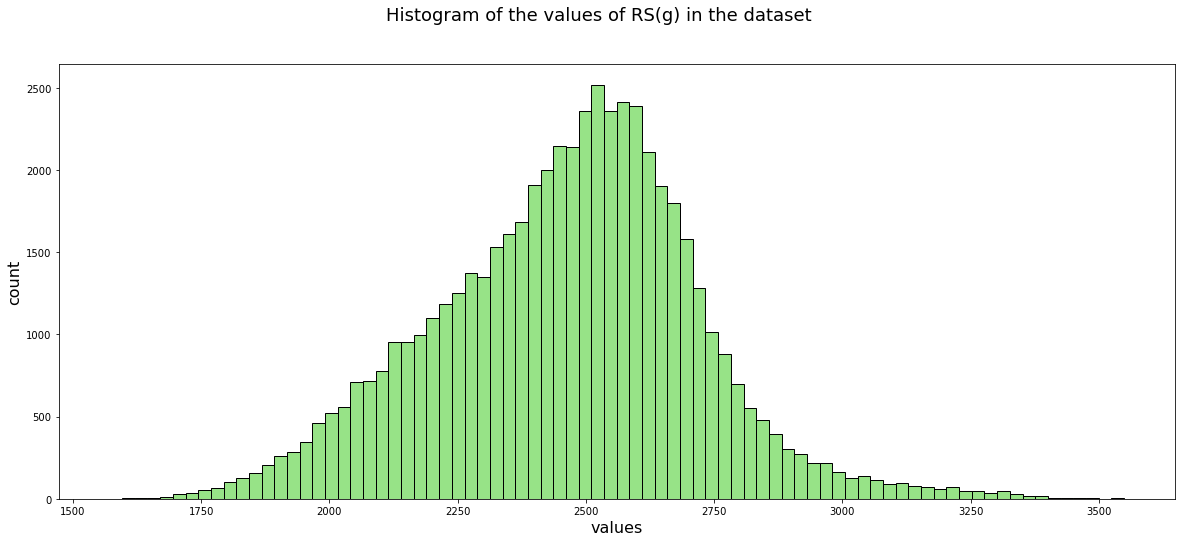

In [13]:
#5
from operator import itemgetter

df_copy = df_ami.copy()
df_copy = df_copy.replace('H', 0)
df_copy = df_copy.replace('M', 1)
df_copy = df_copy.drop(0, axis=1)

RS_arr = []
for i in range(2, len(df_ami)-2):
    rank = 1
    rank_sum_M = 0
    gene_val_arr = np.zeros((2, 99))
    gene_val_arr[0] = df_copy.iloc[0]
    gene_val_arr[1] = df_copy.iloc[i]
    gene_val_arr = np.transpose(gene_val_arr)
    #sorted(gene_val_arr,key=itemgetter(1))
    gene_val_arr_sort = sorted(gene_val_arr, key=lambda x: x[1])
    for j in range (0,99):
        if gene_val_arr_sort[j][0] == 1:
            rank_sum_M += rank
        rank += 1
    RS_arr.append(rank_sum_M)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
fig.suptitle("Histogram of the values of RS(g) in the dataset", fontsize=18)
sns.histplot(x=RS_arr, ax=ax, bins=80, color="#74DA5F", legend=True)
ax.set_xlabel('values', size=16)
ax.set_ylabel('count', size=16)

In [14]:
q75, q25 = np.percentile(RS_arr, [75 ,25])
print ("The IQR of the histogram above is between values {} to {}".format(q25, q75))

The IQR of the histogram above is between values 2296.0 to 2625.0


#### c. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H at a p-value of 0.07. For both directions use both a Student t-test and a WRS test.

In [15]:
sum_under_wrs=0
sum_over_wrs=0
alpha=0.07
wrs_pvalues_arr=[]

for i in range(2, len(df_ami)-2):
    h = df_h.iloc[i].to_numpy()
    h = h.astype(np.float)
    d = df_d.iloc[i].to_numpy()
    d = d.astype(np.float)
    wrs_statistics , wrs_pvalue = scipy.stats.ranksums(h,d)
    
    if (wrs_statistics<0):
        wrs_pvalues_arr.append(wrs_pvalue/2)
        if (wrs_pvalue/2<=alpha):
            sum_under_wrs+=1
    else:
        wrs_pvalues_arr.append(1-wrs_pvalue/2)
        if (wrs_pvalue/2<=alpha):
            sum_over_wrs+=1
print("The number of genes underexpressed in M vs H at a p-value lower (<=) than 0.07 is: {} (wrs)".format(sum_under_wrs))
print("The number of genes overexpressed in M vs H at a p-value better (>=) than 0.93 is: {} (wrs)".format(sum_over_wrs))

The number of genes underexpressed in M vs H at a p-value lower (<=) than 0.07 is: 10786 (wrs)
The number of genes overexpressed in M vs H at a p-value better (>=) than 0.93 is: 10667 (wrs)


In [16]:
#t-test
sum_under_ttest = 0
sum_over_ttest = 0
ttest_pvalues_arr=[]

for i in range(2, len(df_ami)-2):
    h = df_h.iloc[i].to_numpy()
    h = h.astype(np.float)
    d = df_d.iloc[i].to_numpy()
    d = d.astype(np.float)
    t_stat, p_val_ttest = scipy.stats.ttest_ind(h, d)
    
    if t_stat<=0:
        p_less = scipy.stats.t.cdf(t_stat, 97)
        ttest_pvalues_arr.append(p_val_ttest/2)
        if p_less<=0.07:
            sum_under_ttest += 1
    if t_stat>0:
        p_greater = scipy.stats.t.sf(t_stat, 97)
        ttest_pvalues_arr.append(1-p_val_ttest/2)
        if p_greater<=0.07:
            sum_over_ttest += 1
print("The number of genes underexpressed in M vs H at a p-value lower (<=) than 0.07 is: {} (t-test)".format(sum_under_ttest))
print("The number of genes overexpressed in M vs H at a p-value better (>=) than 0.93 is: {} (t-test)".format(sum_over_ttest))

The number of genes underexpressed in M vs H at a p-value lower (<=) than 0.07 is: 8517 (t-test)
The number of genes overexpressed in M vs H at a p-value better (>=) than 0.93 is: 8639 (t-test)


#### d. Correlations 
Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.<br>
1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.<br>
2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏? What is the observed mean of the numbers you calculated in the above section?<br>
3) What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? Explain your answer.<br>
4) How many co-expressed pairs do we observe in FDR=0.05?<br>
5) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?<br>
6) Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?

C:\Users\Or Shoham\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 120591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Or Shoham\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 120591 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

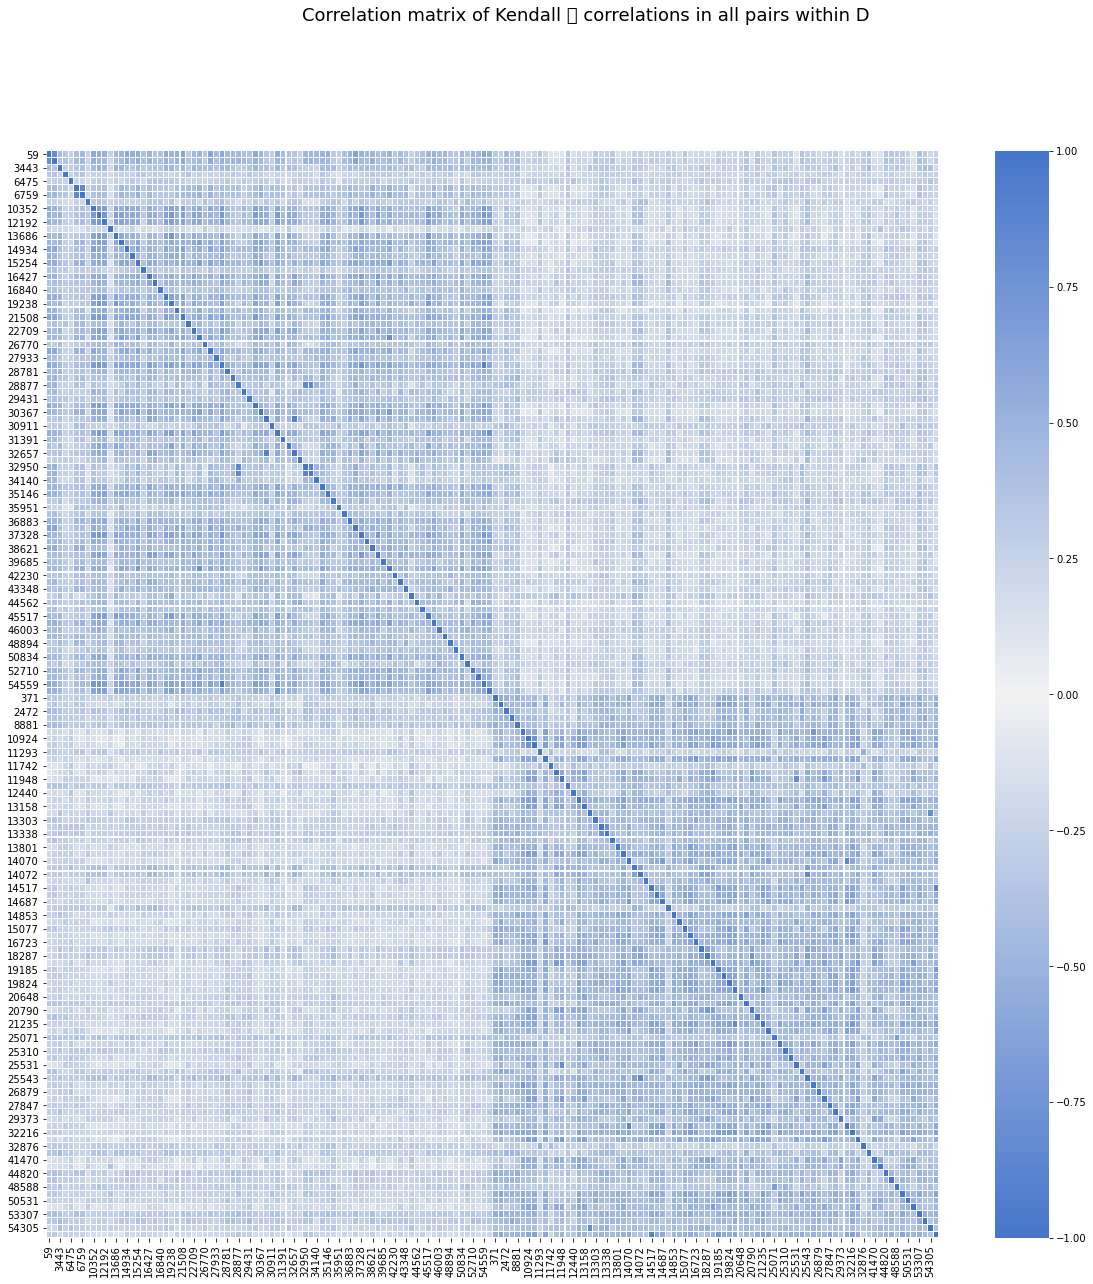

In [17]:
#1
sort_RS_arr = np.sort(RS_arr)
RS_arr_under = sort_RS_arr[79]
RS_arr_over = sort_RS_arr[len(RS_arr)-80]
index_under = np.argwhere(RS_arr <= RS_arr_under).flatten()
index_under = index_under+2
index_over = np.argwhere(RS_arr >= RS_arr_over).flatten()
index_over = index_over+2
df_under = df_ami.iloc[index_under]
df_over = df_ami.iloc[index_over]
D = pd.concat([df_under,df_over])
D = D.drop(0, axis=1)
D = D.astype(float)
D = D.T

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
fig.suptitle('Correlation matrix of Kendall 𝜏 correlations in all pairs within D', fontsize=18)
cmap = sns.diverging_palette(255,255, as_cmap=True)
sns.heatmap(D.corr(method='kendall'), ax=ax, center=0, cmap=cmap, linewidths=0.05, vmin=-1, vmax=1)


#### 2:
Under a NULL model that assumes that genes are pairwise independent, we would expect the coefficient to be approximately zero  for 𝜏.  

In [18]:
D_corr = D.corr(method='kendall')
sum_corr = D_corr.sum(axis=1)
avg_corr = (sum_corr.sum()-160)/(160*160-160) 

print("The observed mean of the numbers we calculated in the above section is {} but if we were looking only at one side of the wrs we would get stronger means as we can see in the above heatmap".format(avg_corr))

The observed mean of the numbers we calculated in the above section is 0.08443955956621585 but if we were looking only at one side of the wrs we would get stronger means as we can see in the above heatmap


#### 3:
What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? Explain your answer.

In [19]:
df_under = df_under.drop(df_under.columns[0] ,axis=1)
df_under = df_under.astype(float)
df_over = df_over.drop(0, axis=1)
df_over = df_over.astype(float)
under_corr = df_under.T.corr(method='kendall')
over_corr = df_over.T.corr(method='kendall')
df_under=df_under.T
df_over=df_over.T

In [20]:
def kendall_pval(x,y):
        return scipy.stats.kendalltau(x,y)[1]

In [21]:
D_corr_pval=D.corr(method=kendall_pval)
D_corr_pval=D_corr_pval.astype(float)
strog_pos_D_corr = ((D_corr_pval < 0.05) & (D_corr >= 0.5)).sum().sum()/2-160

df_under_corr_pval=df_under.corr(method=kendall_pval)
df_under_corr_pval=df_under_corr_pval.astype(float)
strog_pos_under_corr = ((df_under_corr_pval < 0.05) & (under_corr >= 0.5)).sum().sum()/2-80

df_over_corr_pval=df_over.corr(method=kendall_pval)
df_over_corr_pval=df_over_corr_pval.astype(float)
strog_pos_over_corr = ((df_over_corr_pval < 0.05) & (over_corr >= 0.5)).sum().sum()/2-80

print("The total amount of co-expressed genes in D is:")
print(strog_pos_D_corr)
print("The amount of co-expressed genes in only the 80 most over expressed is:")
print(strog_pos_under_corr)
print("The amount of co-expressed genes in only the 80 most under expressed is:")
print(strog_pos_over_corr)

print("Therefore we conclude that the under-expressed and over-expressed genes are most likely to be co-expressed inside their own group and not with the opposite group (as we can clearly see on the attached heatmap above).")

The total amount of co-expressed genes in D is:
1361.0
The amount of co-expressed genes in only the 80 most over expressed is:
550.0
The amount of co-expressed genes in only the 80 most under expressed is:
811.0
Therefore we conclude that the under-expressed and over-expressed genes are most likely to be co-expressed inside their own group and not with the opposite group (as we can clearly see on the attached heatmap above).


#### 4:
How many co-expressed pairs do we observe in FDR=0.05?

In [22]:
sorted_pvalues=[]
for i in range(160):
    for j in range(160):
        if i>j:
            sorted_pvalues.append(D_corr_pval.iloc[i,j])
sorted_pvalues=np.sort(sorted_pvalues)
fdr = np.zeros(len(sorted_pvalues))
for i in range(1, len(fdr)):
    fdr[i]=(sorted_pvalues[i]*len(fdr)/i)
fdr_005 = fdr[fdr<=0.05]
print('The number of co-expressed pairs we observe in FDR=0.05 is:')
print(len(fdr_005))

The number of co-expressed pairs we observe in FDR=0.05 is:
12353


#### 5:
What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

Advantages:
1. Significantly more data - means more accurate result. Probably more strong-correlated pairs (that will need to be corrected by some multiple tests method).

Disadvantages:
1. Requires a lot more computing time.
2. We might get more false-positive results, that will need to be corrected by FDR method (that will require even more computing time).

#### 6:
Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?

In [23]:
df_under_d = df_d.iloc[index_under]
df_over_d = df_d.iloc[index_over]

D_d = pd.concat([df_under_d,df_over_d])
D_d = D_d.astype(float)
D_d = D_d.T

C:\Users\Or Shoham\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 120591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Or Shoham\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 120591 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

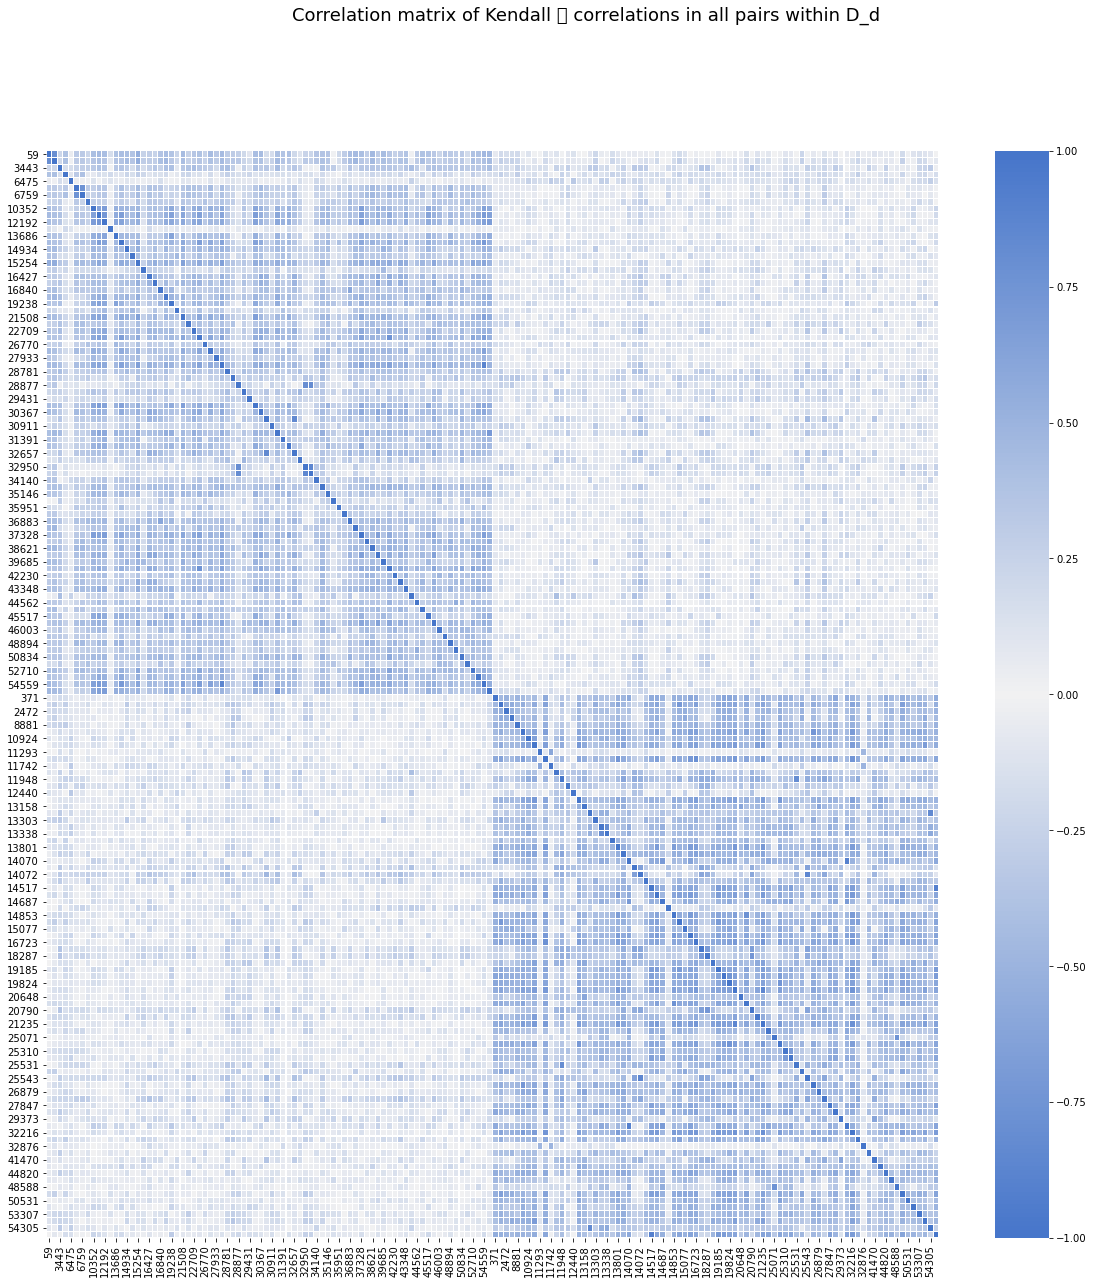

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
fig.suptitle('Correlation matrix of Kendall 𝜏 correlations in all pairs within D_d', fontsize=18)
cmap = sns.diverging_palette(255,255, as_cmap=True)
sns.heatmap(D_d.corr(method='kendall'), ax=ax, center=0, cmap=cmap, linewidths=0.05, vmin=-1, vmax=1)

In [25]:
D_d_corr = D_d.corr(method='kendall')
sum_corr = D_d_corr.sum(axis=1)
avg_corr = (sum_corr.sum()-160)/(160*160-160) 

print("The observed mean of the numbers we calculated in the above section is {}".format(avg_corr))

The observed mean of the numbers we calculated in the above section is 0.13607717316955295


In [26]:
df_under_d = df_under_d.astype(float)
df_over_d = df_over_d.astype(float)
under_corr_d = df_under_d.T.corr(method='kendall')
over_corr_d = df_over_d.T.corr(method='kendall')
df_under_d=df_under_d.T
df_over_d=df_over_d.T

In [27]:
D_d_corr_pval=D_d.corr(method=kendall_pval)
D_d_corr_pval=D_d_corr_pval.astype(float)
strog_pos_D_d_corr = ((D_d_corr_pval < 0.05) & (D_d_corr >= 0.5)).sum().sum()/2-160

df_under_d_corr_pval=df_under_d.corr(method=kendall_pval)
df_under_d_corr_pval=df_under_d_corr_pval.astype(float)
strog_pos_under_d_corr = ((df_under_d_corr_pval < 0.05) & (under_corr_d >= 0.5)).sum().sum()/2-80

df_over_d_corr_pval=df_over_d.corr(method=kendall_pval)
df_over_d_corr_pval=df_over_d_corr_pval.astype(float)
strog_pos_over_d_corr = ((df_over_d_corr_pval < 0.05) & (over_corr_d >= 0.5)).sum().sum()/2-80

print("The total amount of co-expressed genes in D_d is:")
print(strog_pos_D_d_corr)
print("The amount of co-expressed genes in only the 80 most over expressed is:")
print(strog_pos_under_d_corr)
print("The amount of co-expressed genes in only the 80 most under expressed is:")
print(strog_pos_over_d_corr)

print("Therefore we conclude that the under-expressed and over-expressed genes are most likely to be co-expressed inside their own group and not with the opposite group (as we can clearly see on the attached heatmap above).")

The total amount of co-expressed genes in D_d is:
744.0
The amount of co-expressed genes in only the 80 most over expressed is:
165.0
The amount of co-expressed genes in only the 80 most under expressed is:
579.0
Therefore we conclude that the under-expressed and over-expressed genes are most likely to be co-expressed inside their own group and not with the opposite group (as we can clearly see on the attached heatmap above).


In [28]:
sorted_pvalues_d=[]
for i in range(160):
    for j in range(160):
        if i>j:
            sorted_pvalues_d.append(D_d_corr_pval.iloc[i,j])
sorted_pvalues_d=np.sort(sorted_pvalues_d)
fdr_d = np.zeros(len(sorted_pvalues_d))
for i in range(1, len(fdr_d)):
    fdr_d[i]=(sorted_pvalues_d[i]*len(fdr_d)/i)
fdr_d_005 = fdr_d[fdr_d<=0.05]
print('The number of co-expressed pairs we observe in FDR=0.05 is:')
print(len(fdr_d_005))

The number of co-expressed pairs we observe in FDR=0.05 is:
4976


Differences between M and D:
We can see that the total number of co-expressed genes in D_d is about 50% of the total in D - therefore we can understand that there is no exception in the diseased group regarding this inication.

The only anomaly we can see is with the number of co-expressed genes in the 80 most under-expressed genes - that are a lot higher that the number in D (normalized to the size of the group).

#### e. Plots and Conclusions of the DE and correlation analysis
1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.<br><br>
State, for each comparison, the number of genes, k, at which we observe:<br><br>
a) FDR = 0.05<br>
b) FDR = 0.01<br>
c) FDR = 0.005<br><br>
If these events are not observed at any k, then make that statement.<br><br>
2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.<br><br>
3) Heatmap Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.<br>

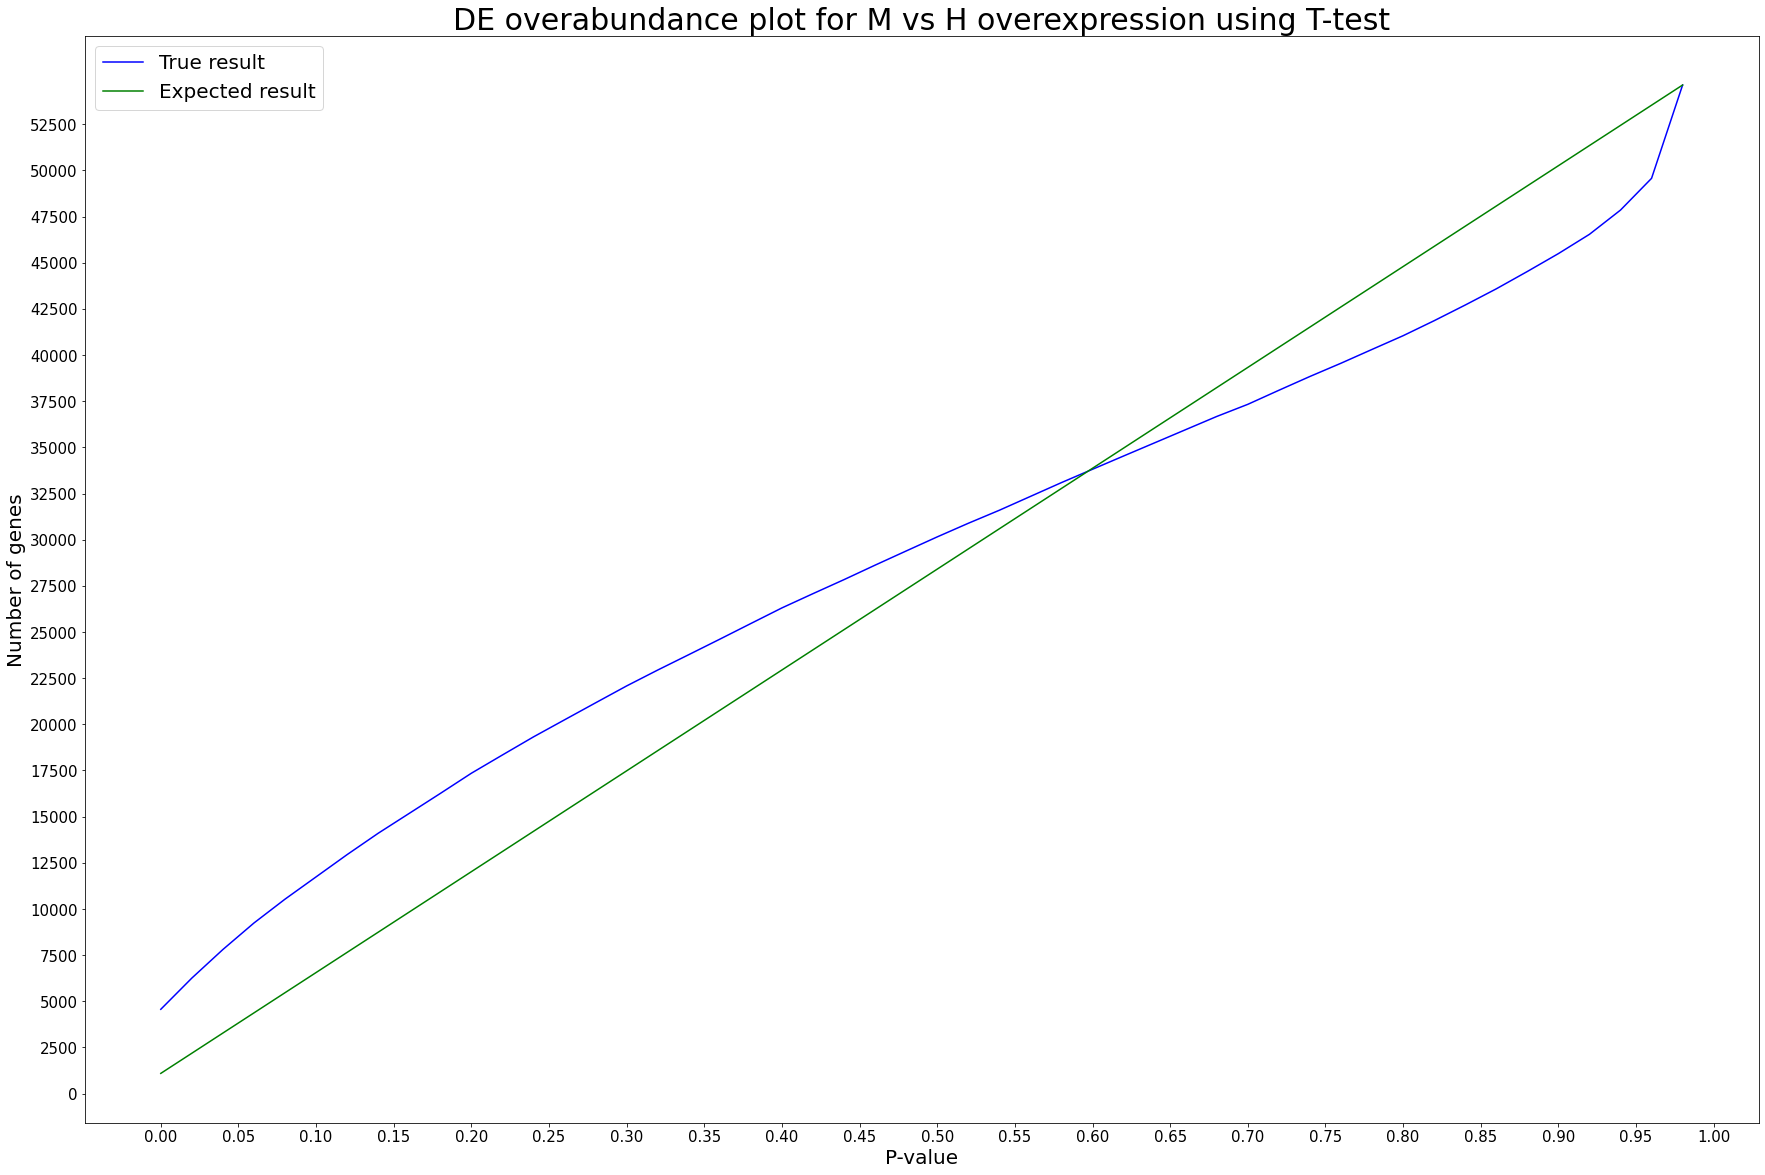

In [29]:
#t-test
fig, ax = plt.subplots(figsize=(30,20))
de_ttest =np.sort(ttest_pvalues_arr)
y = np.linspace(0,1,len(de_ttest))
values1, base = np.histogram(de_ttest, bins=50)
cum = np.cumsum(values1)
plt.plot(base[:-1], cum, c='blue',label="True result")
values2, base2 = np.histogram(y, bins=50)
cum = np.cumsum(values2)
plt.plot(base2[:-1], cum, c='green',label="Expected result")
plt.xticks(np.arange(0,1.05,0.05),fontsize=15)
plt.yticks(np.arange(0,len(de_ttest),2500),fontsize=15)
plt.legend(fontsize=20)
plt.title('DE overabundance plot for M vs H overexpression using T-test',fontsize=30)
plt.xlabel('P-value',fontsize=20)
plt.ylabel('Number of genes',fontsize=20)
plt.show()

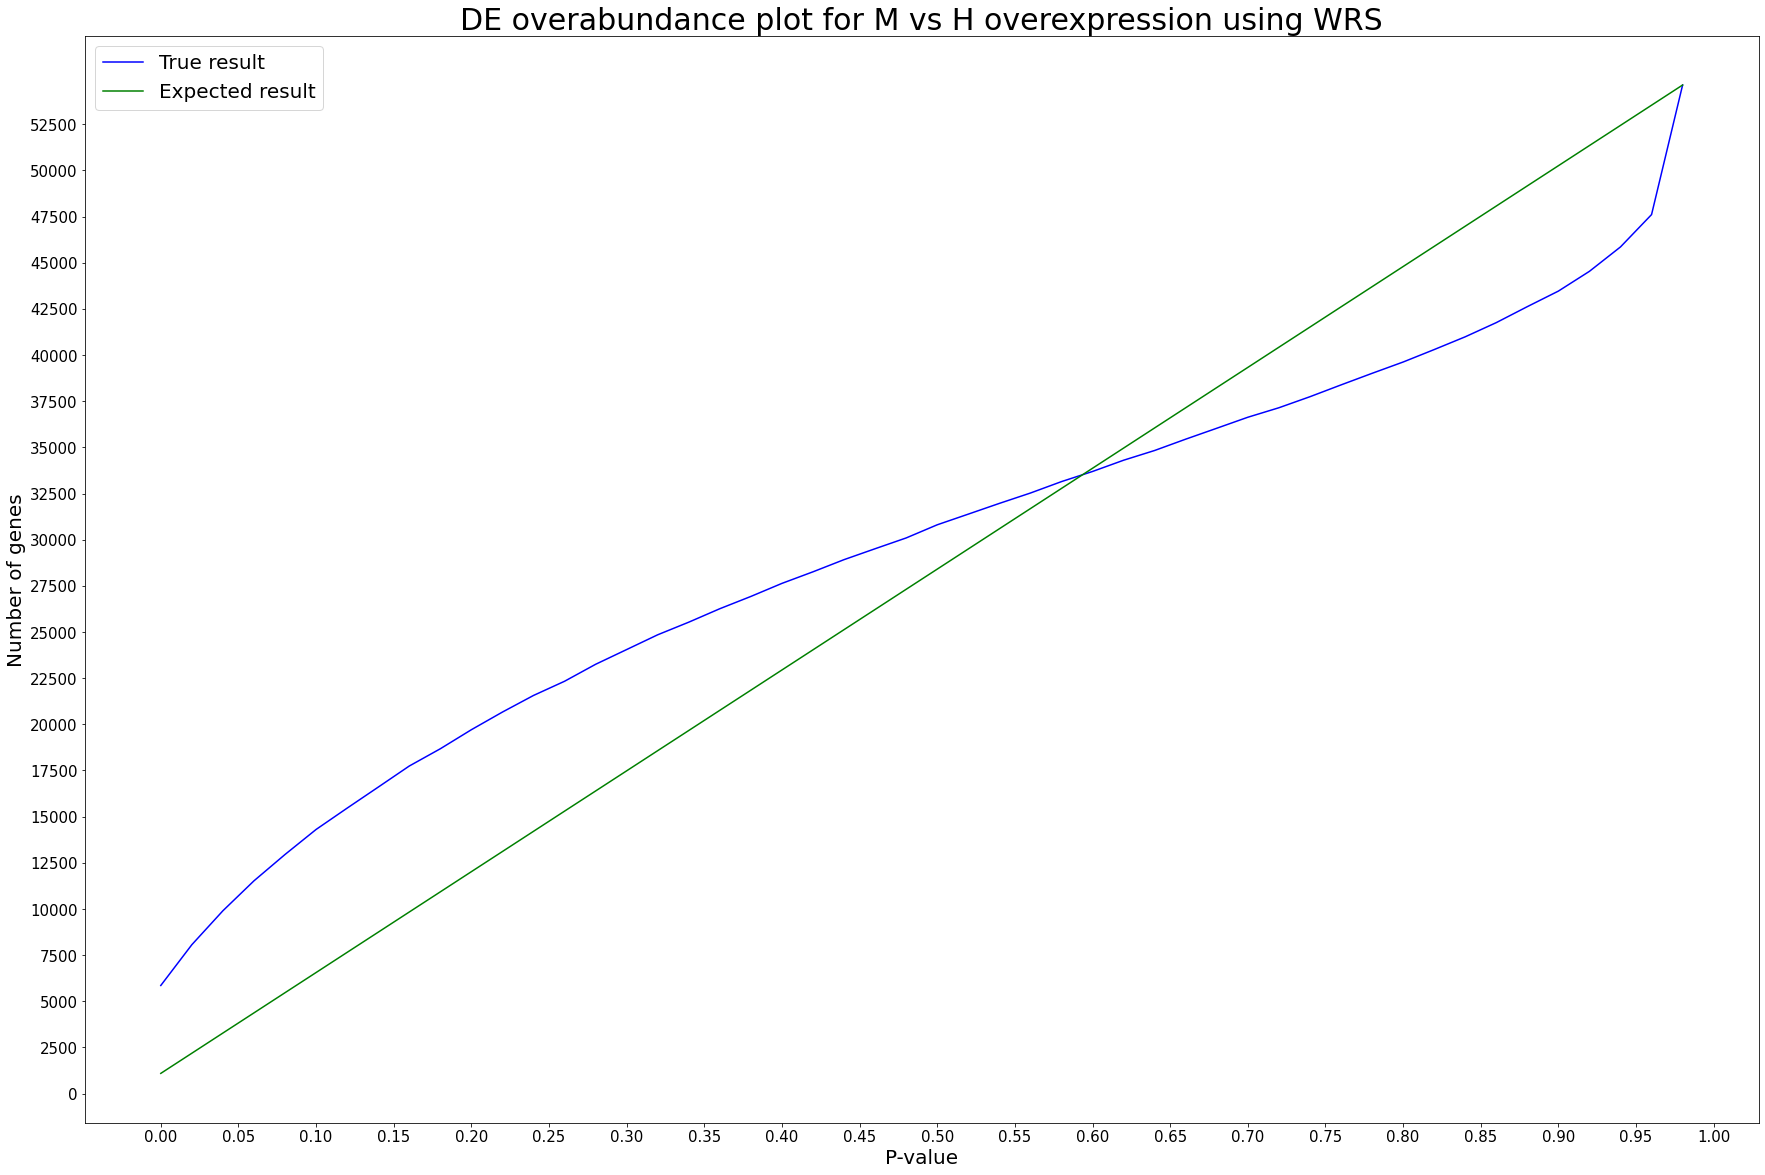

In [30]:
#WRS
fig, ax = plt.subplots(figsize=(30,20))
de_wrs =np.sort(wrs_pvalues_arr)
y = np.linspace(0,1,len(de_wrs))
values1, base = np.histogram(de_wrs, bins=50)
cum = np.cumsum(values1)
plt.plot(base[:-1], cum, c='blue',label="True result")
values2, base2 = np.histogram(y, bins=50)
cum = np.cumsum(values2)
plt.plot(base2[:-1], cum, c='green',label="Expected result")
plt.xticks(np.arange(0,1.05,0.05),fontsize=15)
plt.yticks(np.arange(0,len(de_wrs),2500),fontsize=15)
plt.legend(fontsize=20)
plt.title('DE overabundance plot for M vs H overexpression using WRS',fontsize=30)
plt.xlabel('P-value',fontsize=20)
plt.ylabel('Number of genes',fontsize=20)
plt.show()

In [31]:
def fdr_compute (alpha, method):
    if method==0: #meaning using ttest
        de=de_ttest
    elif method==1: #meaning using wrs
        de=de_wrs
    n=len(de)
    fdr_arr = np.zeros(len(de))
    for i in range(1, len(fdr_arr)):
        fdr_arr[i]=(de[i]*n/i)
    fdr_per_alpha = fdr_arr[fdr_arr<=alpha]
    return len(fdr_per_alpha)
print('Results using T test:')
print ('Number of genes k, with FDR of 0.05 is %.f' %(fdr_compute(0.05,0)))
print ('Number of genes k, with FDR of 0.01 is %.f' %(fdr_compute(0.01,0)))     
print ('Number of genes k, with FDR of 0.005 is %.f' %(fdr_compute(0.005,0)))

print('Results using WRS:')
print ('Number of genes k, with FDR of 0.05 is %.f' %(fdr_compute(0.05,1)))
print ('Number of genes k, with FDR of 0.01 is %.f' %(fdr_compute(0.01,1)))     
print ('Number of genes k, with FDR of 0.005 is %.f' %(fdr_compute(0.005,1)))

Results using T test:
Number of genes k, with FDR of 0.05 is 2102
Number of genes k, with FDR of 0.01 is 1305
Number of genes k, with FDR of 0.005 is 1104
Results using WRS:
Number of genes k, with FDR of 0.05 is 2795
Number of genes k, with FDR of 0.01 is 1601
Number of genes k, with FDR of 0.005 is 1323


2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

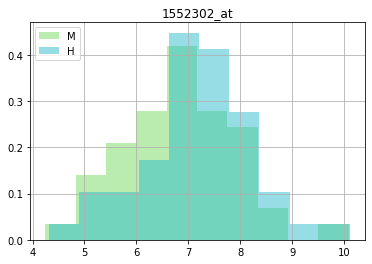

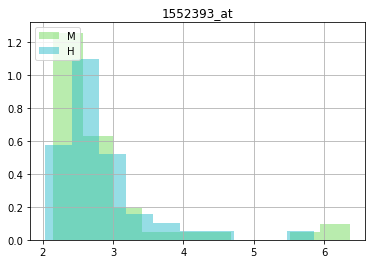

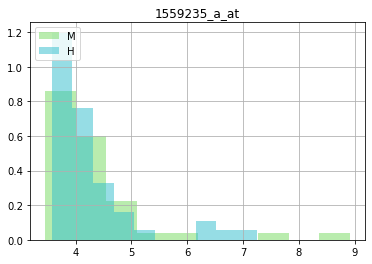

In [32]:
for i in [45, 103, 4672]:
    gene=df_ami.loc[i,0]
    plt.figure()
    M=df_ami.loc[i,df_ami.iloc[0]=='M'].astype(float)
    H=df_ami.loc[i,df_ami.iloc[0]=='H'].astype(float)
    M.hist(bins=10, alpha=0.5, label='M', density=True, color='#74DA5F')
    H.hist(bins=10, alpha=0.5, label='H', density=True, color='#2FBDCC')
    plt.legend(loc='upper left')
    plt.title(gene)    

3) Heatmap Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

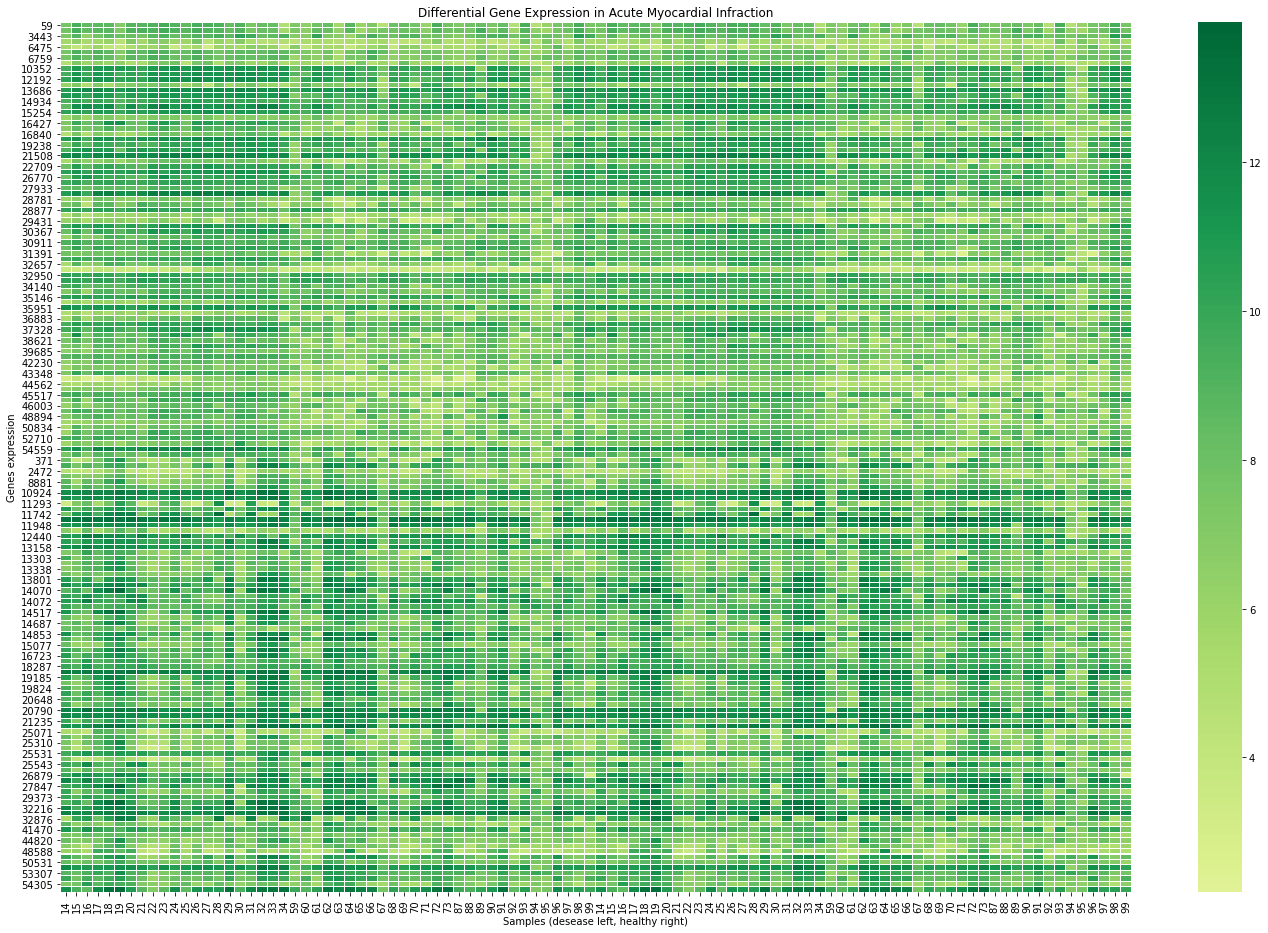

In [48]:
#order by healthy samples vs desease samples
df_under_h = df_h.iloc[index_under]
df_over_h = df_h.iloc[index_over]
D_h = pd.concat([df_under_h,df_over_h])
D_h = D_d.astype(float)

D_mh = pd.concat([D_d,D_h], axis=0) #already calculated D_d
D_mh = D_mh.T
plt.figure(figsize=(24,16))
sns.heatmap(D_mh, center=0, cmap='RdYlGn', linewidths=0.01)
plt.ylabel('Genes expression')
plt.xlabel('Samples (desease left, healthy right)')
plt.title("Differential Gene Expression in Acute Myocardial Infraction")
plt.show()